In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

# Load the data
data = pd.read_csv('train.csv')
predict_data = pd.read_csv('test.csv')

In [2]:
data.head()

,Id,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70


In [3]:
data.shape

(31599, 15)

In [4]:
# Specify the columns where "not mentioned" should be replaced with NaN
columns_to_replace = ['Power_Backup', 'Water_Supply']  # Replace with your actual column names

# Replace 'not mentioned' with NaN in specified columns
for col in columns_to_replace:
    data[col].replace('NOT MENTIONED', pd.NA, inplace=True)
    predict_data[col].replace('NOT MENTIONED', pd.NA, inplace=True)

C:\Users\kithu\AppData\Local\Temp\ipykernel_23452\3728735419.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].replace('NOT MENTIONED', pd.NA, inplace=True)
C:\Users\kithu\AppData\Local\Temp\ipykernel_23452\3728735419.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31599 entries, 0 to 31598
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      31599 non-null  object 
 1   Property_Type           31599 non-null  object 
 2   Property_Area           31599 non-null  int64  
 3   Number_of_Windows       30266 non-null  float64
 4   Number_of_Doors         31599 non-null  int64  
 5   Furnishing              30771 non-null  object 
 6   Frequency_of_Powercuts  30490 non-null  float64
 7   Power_Backup            30920 non-null  object 
 8   Water_Supply            31341 non-null  object 
 9   Traffic_Density_Score   31599 non-null  float64
 10  Crime_Rate              30970 non-null  object 
 11  Dust_and_Noise          30600 non-null  object 
 12  Air_Quality_Index       31599 non-null  float64
 13  Neighborhood_Review     31599 non-null  float64
 14  Habitability_score      31599 non-null

In [6]:
# Check the columns which have the same value for all records.
unique_columns = [data.nunique() == 1]
unique_columns

[Id                        False
 Property_Type             False
 Property_Area             False
 Number_of_Windows         False
 Number_of_Doors           False
 Furnishing                False
 Frequency_of_Powercuts    False
 Power_Backup              False
 Water_Supply              False
 Traffic_Density_Score     False
 Crime_Rate                False
 Dust_and_Noise            False
 Air_Quality_Index         False
 Neighborhood_Review       False
 Habitability_score        False
 dtype: bool]

In [7]:
#Devide the train set into train and test sets.
from sklearn.model_selection import train_test_split

X = data.drop(['Habitability_score'], axis=1)
y = data['Habitability_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
#Identify numerical and categorical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns      #Numerical features
categorical_features = X_train.select_dtypes(include=['object']).columns              #Categorical features

In [9]:
numerical_features

Index(['Property_Area', 'Number_of_Windows', 'Number_of_Doors',
       'Frequency_of_Powercuts', 'Traffic_Density_Score', 'Air_Quality_Index',
       'Neighborhood_Review'],
      dtype='object')

In [10]:
categorical_features

Index(['Id', 'Property_Type', 'Furnishing', 'Power_Backup', 'Water_Supply',
       'Crime_Rate', 'Dust_and_Noise'],
      dtype='object')

In [11]:
#Impute missing values for numerical features
X_train[numerical_features] = X_train[numerical_features].fillna(X_train[numerical_features].mean())
X_test[numerical_features] = X_test[numerical_features].fillna(X_test[numerical_features].mean())
predict_data[numerical_features] = predict_data[numerical_features].fillna(predict_data[numerical_features].mean())

#impute missing values for categorical columns
X_train[categorical_features] = X_train[categorical_features].fillna(X_train[categorical_features].mode().iloc[0])
X_test[categorical_features] = X_test[categorical_features].fillna(X_test[categorical_features].mode().iloc[0])
predict_data[categorical_features] = predict_data[categorical_features].fillna(predict_data[categorical_features].mode().iloc[0])


In [12]:
X_train.isnull().sum()  

Id                        0
Property_Type             0
Property_Area             0
Number_of_Windows         0
Number_of_Doors           0
Furnishing                0
Frequency_of_Powercuts    0
Power_Backup              0
Water_Supply              0
Traffic_Density_Score     0
Crime_Rate                0
Dust_and_Noise            0
Air_Quality_Index         0
Neighborhood_Review       0
dtype: int64

In [13]:
X_train

,Id,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review
9116,0x9ab5,Single-family home,2289,2.0,1,Semi_Furnished,0.0,Yes,All time,5.45,Slightly below average,Medium,99.0,4.17
27807,0xa402,Bungalow,1872,10.0,3,Semi_Furnished,2.0,No,All time,6.79,Slightly below average,Medium,153.0,2.84
5183,0x151e,Bungalow,2515,11.0,2,Fully Furnished,2.0,Yes,All time,4.06,Slightly below average,Medium,102.0,2.92
30997,0x2072,Apartment,458,3.0,3,Semi_Furnished,0.0,No,All time,5.15,Well below average,Medium,107.0,4.79
25409,0x8feb,Single-family home,1279,5.0,4,Semi_Furnished,0.0,No,Once in a day - Morning,7.07,Well below average,Medium,149.0,4.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12179,0x5636,Single-family home,1671,4.0,2,Fully Furnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,88.0,3.56
6768,0x9b27,Apartment,18932,1.0,2,Fully Furnished,1.0,No,Once in a day - Evening,8.64,Slightly below average,High,148.0,2.77
25602,0x5d80,Apartment,867,3.0,2,Semi_Furnished,0.0,Yes,Once in a day - Morning,7.22,Slightly below average,Medium,110.0,3.83
22971,0x89a1,Single-family home,1555,5.0,4,Unfurnished,1.0,Yes,All time,6.84,Well below average,Medium,130.0,4.12


In [14]:
#Get number of unique values in all categorical columns
unique_values = X_train[categorical_features].nunique()
unique_values

Id                25279
Property_Type         6
Furnishing            3
Power_Backup          2
Water_Supply          4
Crime_Rate            4
Dust_and_Noise        3
dtype: int64

In [15]:
#Drop the Id column since it's just an identifier(Not a feature)
X_train = X_train.drop(['Id'], axis=1)
X_test = X_test.drop(['Id'], axis=1)
categorical_features = categorical_features.drop('Id')
predict_data_1 = predict_data                         #With Id column
predict_data_2 = predict_data.drop(['Id'], axis=1)    #Without Id column

In [16]:
X_train[categorical_features].head()

,Property_Type,Furnishing,Power_Backup,Water_Supply,Crime_Rate,Dust_and_Noise
9116,Single-family home,Semi_Furnished,Yes,All time,Slightly below average,Medium
27807,Bungalow,Semi_Furnished,No,All time,Slightly below average,Medium
5183,Bungalow,Fully Furnished,Yes,All time,Slightly below average,Medium
30997,Apartment,Semi_Furnished,No,All time,Well below average,Medium
25409,Single-family home,Semi_Furnished,No,Once in a day - Morning,Well below average,Medium


In [17]:
#Get Ordinal Encoding for Furnishing.
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
X_train[['Furnishing']] = ordinal_encoder.fit_transform(X_train[['Furnishing']].values.reshape(-1,1))
X_test[['Furnishing']] = ordinal_encoder.transform(X_test[['Furnishing']].values.reshape(-1,1))
predict_data_2[['Furnishing']] = ordinal_encoder.transform(predict_data_1[['Furnishing']].values.reshape(-1,1))

X_train[['Furnishing']].head()

,Furnishing
9116,1.0
27807,1.0
5183,0.0
30997,1.0
25409,1.0


In [18]:
#Get Binary  Encoding for Power_Backup 
X_train[['Power_Backup']] = ordinal_encoder.fit_transform(X_train[['Power_Backup']].values.reshape(-1,1))
X_test[['Power_Backup']] = ordinal_encoder.transform(X_test[['Power_Backup']].values.reshape(-1,1))
predict_data_2[['Power_Backup']] = ordinal_encoder.transform(predict_data_2[['Power_Backup']].values.reshape(-1,1))

X_train[['Power_Backup']].head()

,Power_Backup
9116,1.0
27807,0.0
5183,1.0
30997,0.0
25409,0.0


In [19]:
#Get Ordinal Encoding for Water_Supply
X_train[['Water_Supply']] = ordinal_encoder.fit_transform(X_train[['Water_Supply']].values.reshape(-1,1))
X_test[['Water_Supply']] = ordinal_encoder.transform(X_test[['Water_Supply']].values.reshape(-1,1))
predict_data_2[['Water_Supply']] = ordinal_encoder.transform(predict_data_2[['Water_Supply']].values.reshape(-1,1))
                                                             
X_train[['Water_Supply']].head()

,Water_Supply
9116,0.0
27807,0.0
5183,0.0
30997,0.0
25409,2.0


In [20]:
#Get Ordinal Encoding for Crime_rate
X_train[['Crime_Rate']] = ordinal_encoder.fit_transform(X_train[['Crime_Rate']].values.reshape(-1,1))
X_test[['Crime_Rate']] = ordinal_encoder.transform(X_test[['Crime_Rate']].values.reshape(-1,1))
predict_data_2[['Crime_Rate']] = ordinal_encoder.transform(predict_data_2[['Crime_Rate']].values.reshape(-1,1))

X_train[['Crime_Rate']].head()

,Crime_Rate
9116,1.0
27807,1.0
5183,1.0
30997,3.0
25409,3.0


In [21]:
#Get Ordinal Encoding for Dust_and_Noise
X_train[['Dust_and_Noise']] = ordinal_encoder.fit_transform(X_train[['Dust_and_Noise']].values.reshape(-1,1))
X_test[['Dust_and_Noise']] = ordinal_encoder.transform(X_test[['Dust_and_Noise']].values.reshape(-1,1))
predict_data_2[['Dust_and_Noise']] = ordinal_encoder.transform(predict_data_2[['Dust_and_Noise']].values.reshape(-1,1))

X_train[['Dust_and_Noise']].head()

,Dust_and_Noise
9116,2.0
27807,2.0
5183,2.0
30997,2.0
25409,2.0


In [22]:
X_train['Property_Type'].head()

9116     Single-family home
27807              Bungalow
5183               Bungalow
30997             Apartment
25409    Single-family home
Name: Property_Type, dtype: object

In [23]:
#Get one hot encoding for Property_Type
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()
X_train_encoded = one_hot_encoder.fit_transform(X_train[['Property_Type']])
X_test_encoded = one_hot_encoder.transform(X_test[['Property_Type']])
predict_data_encoded = one_hot_encoder.transform(predict_data_2[['Property_Type']])

X_train_encoded = pd.DataFrame(X_train_encoded.toarray(), columns=one_hot_encoder.get_feature_names_out(['Property_Type']))
X_test_encoded = pd.DataFrame(X_test_encoded.toarray(), columns=one_hot_encoder.get_feature_names_out(['Property_Type']))
predict_data_encoded = pd.DataFrame(predict_data_encoded.toarray(), columns=one_hot_encoder.get_feature_names_out(['Property_Type']))
X_train = X_train.drop(['Property_Type'], axis=1)
X_test = X_test.drop(['Property_Type'], axis=1)
predict_data_2 = predict_data_2.drop(['Property_Type'], axis=1)

X_train_encoded

,Property_Type_#R%$G&867,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
25274,0.0,0.0,0.0,0.0,0.0,1.0
25275,0.0,1.0,0.0,0.0,0.0,0.0
25276,0.0,1.0,0.0,0.0,0.0,0.0
25277,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
train_data = X_train.join(y_train)
train_data.shape

(25279, 13)

array([[<Axes: title={'center': 'Property_Area'}>,
        <Axes: title={'center': 'Number_of_Windows'}>,
        <Axes: title={'center': 'Number_of_Doors'}>,
        <Axes: title={'center': 'Furnishing'}>],
       [<Axes: title={'center': 'Frequency_of_Powercuts'}>,
        <Axes: title={'center': 'Power_Backup'}>,
        <Axes: title={'center': 'Water_Supply'}>,
        <Axes: title={'center': 'Traffic_Density_Score'}>],
       [<Axes: title={'center': 'Crime_Rate'}>,
        <Axes: title={'center': 'Dust_and_Noise'}>,
        <Axes: title={'center': 'Air_Quality_Index'}>,
        <Axes: title={'center': 'Neighborhood_Review'}>],
       [<Axes: title={'center': 'Habitability_score'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

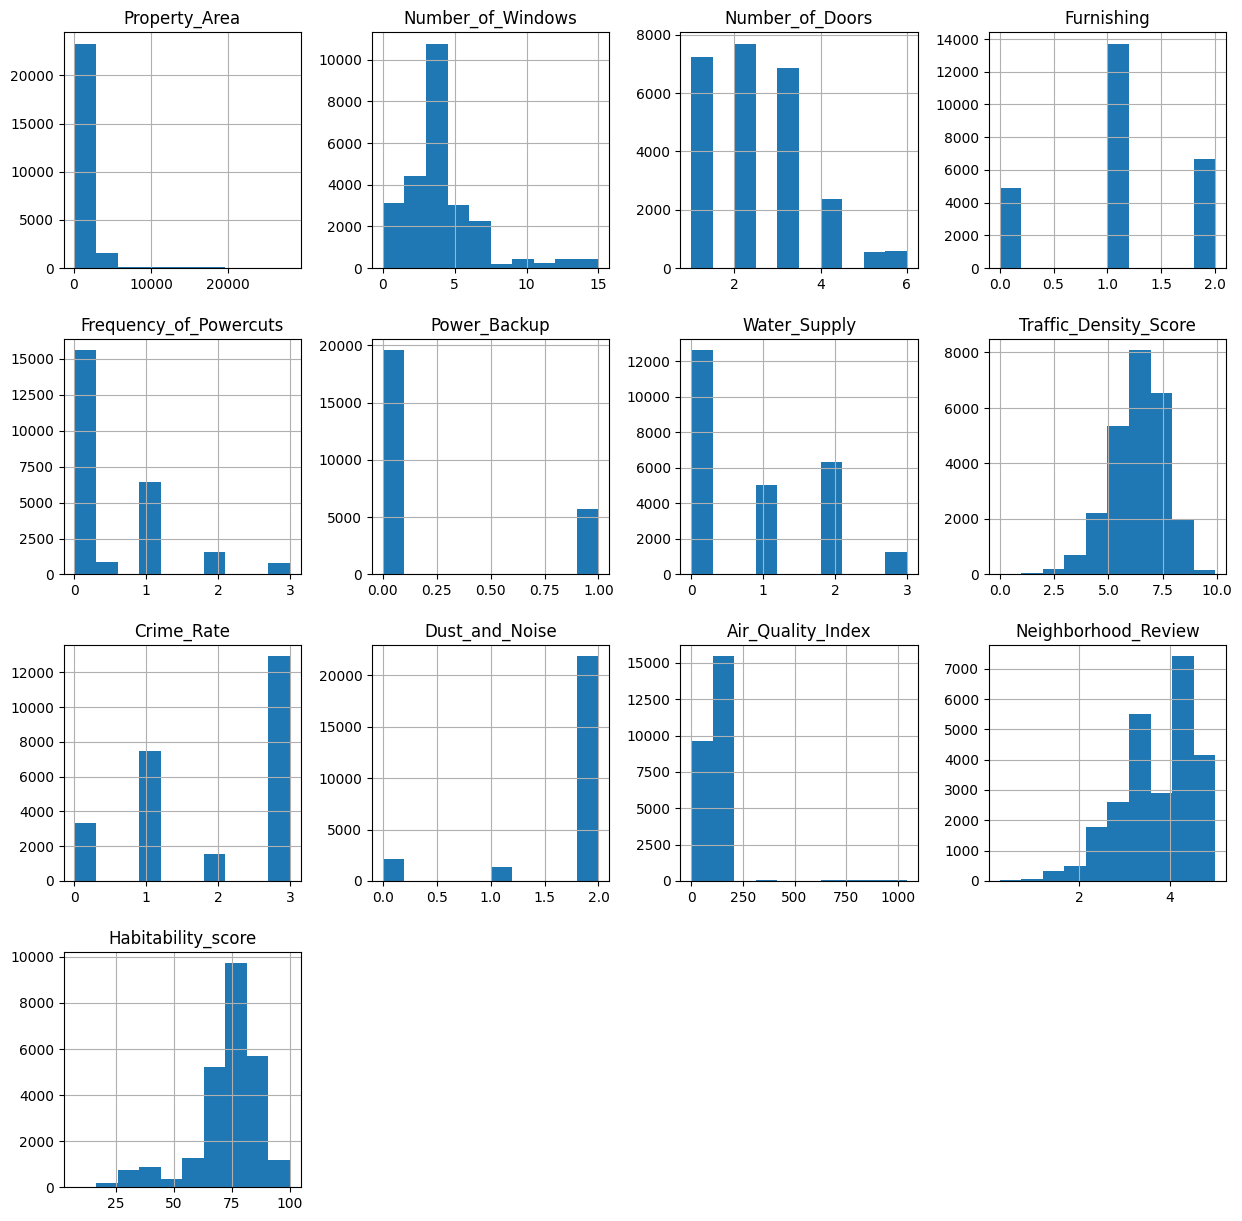

In [25]:
train_data.hist(figsize=(15, 15))

<Axes: >

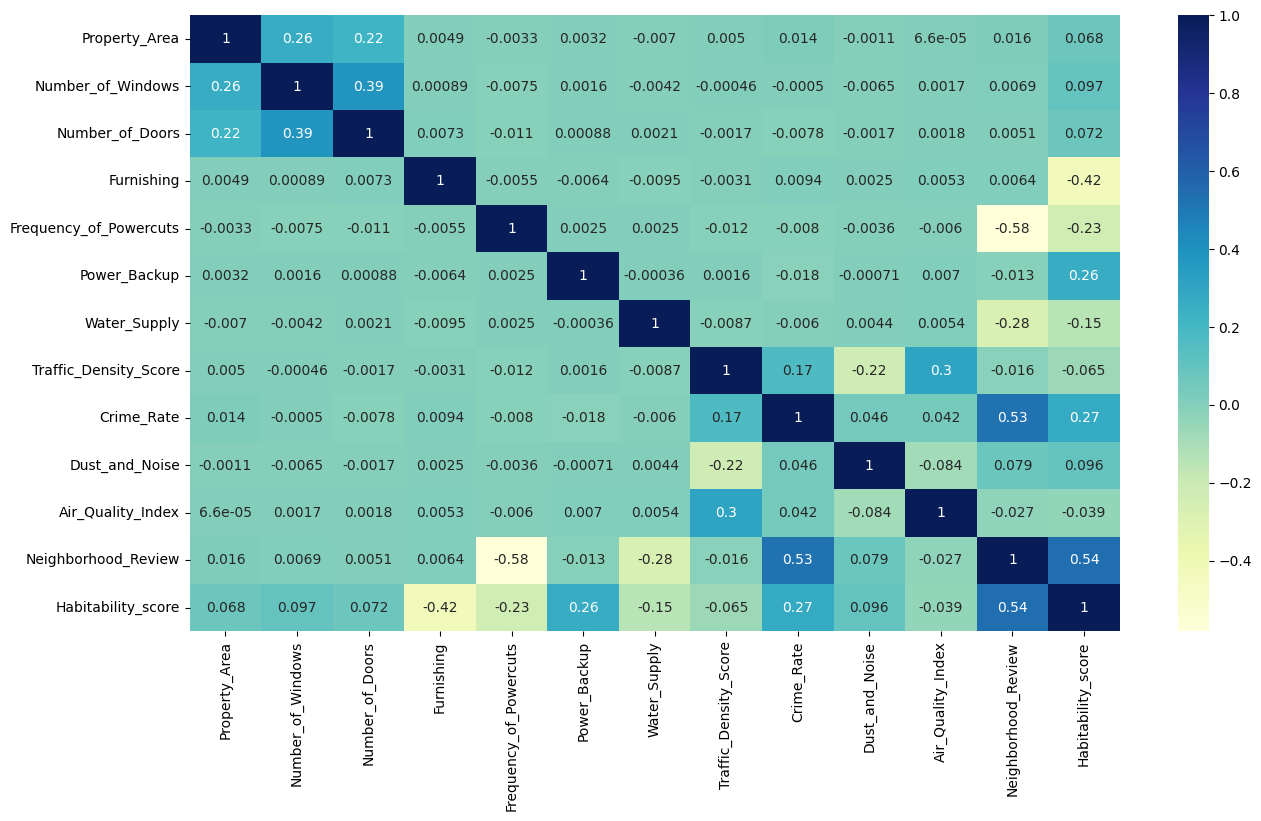

In [26]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [27]:
X_train_1, X_test_1, y_train_1, y_test_1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [28]:
X_train

,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review
9116,2289,2.0,1,1.0,0.0,1.0,0.0,5.45,1.0,2.0,99.0,4.17
27807,1872,10.0,3,1.0,2.0,0.0,0.0,6.79,1.0,2.0,153.0,2.84
5183,2515,11.0,2,0.0,2.0,1.0,0.0,4.06,1.0,2.0,102.0,2.92
30997,458,3.0,3,1.0,0.0,0.0,0.0,5.15,3.0,2.0,107.0,4.79
25409,1279,5.0,4,1.0,0.0,0.0,2.0,7.07,3.0,2.0,149.0,4.41
...,...,...,...,...,...,...,...,...,...,...,...,...
12179,1671,4.0,2,0.0,1.0,0.0,1.0,4.37,3.0,2.0,88.0,3.56
6768,18932,1.0,2,0.0,1.0,0.0,1.0,8.64,1.0,0.0,148.0,2.77
25602,867,3.0,2,1.0,0.0,1.0,2.0,7.22,1.0,2.0,110.0,3.83
22971,1555,5.0,4,2.0,1.0,1.0,0.0,6.84,3.0,2.0,130.0,4.12


In [29]:
#Model using Linear Regression
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()
model_1.fit(X_train_1, y_train_1)

LinearRegression()

In [30]:
y_pred_1 = model_1.predict(X_test_1)

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming y_true and y_pred are arrays of true and predicted values, respectively

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_1, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_1, y_pred_1)
print("Mean Absolute Error (MAE):", mae)

# R-squared (R^2) Score
r2 = r2_score(y_test_1, y_pred_1)
print("R-squared (R^2) Score:", r2)

# Adjusted R-squared (R^2) Score
n = len(y_test_1)
p = X_train_1.shape[1]  
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print("Adjusted R-squared:", adjusted_r2)

NameError: name 'y_pred' is not defined

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [ ]:
#Model using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

model_2 = RandomForestRegressor()
model_2.fit(X_train_2, y_train_2)

RandomForestRegressor()

In [ ]:
model_2.score(X_test_2, y_test_2)

0.8206438062899074

In [ ]:
y_pred_2 = model_2.predict(X_test_2)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming y_true and y_pred are arrays of true and predicted values, respectively

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_2, y_pred_2)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_2, y_pred_2)
print("Mean Absolute Error (MAE):", mae)

# R-squared (R^2) Score
r2 = r2_score(y_test_2, y_pred_2)
print("R-squared (R^2) Score:", r2)

# Adjusted R-squared (R^2) Score
n = len(y_test_2)
p = X_train_2.shape[1]  
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error (MSE): 36.289773936992084
Root Mean Squared Error (RMSE): 6.024099429540659
Mean Absolute Error (MAE): 4.644263053797468
R-squared (R^2) Score: 0.8206438062899074
Adjusted R-squared: 0.820302554613275


In [ ]:
X_train_3, X_test_3, y_train_3, y_test_3 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [ ]:
import xgboost
model_3 = xgboost.XGBRegressor()


In [ ]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV

random_cv = RandomizedSearchCV(estimator=model_3,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv.fit(X_train_3, y_train_3)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [ ]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
model_3 = xgboost.XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=3, missing=np.nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None)

In [ ]:
model_3.fit(X_train_3, y_train_3)

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_3 = model_3.predict(X_test_3)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming y_true and y_pred are arrays of true and predicted values, respectively

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_3, y_pred_3)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_3, y_pred_3)
print("Mean Absolute Error (MAE):", mae)

# R-squared (R^2) Score
r2 = r2_score(y_test_3, y_pred_3)
print("R-squared (R^2) Score:", r2)

# Adjusted R-squared (R^2) Score
n = len(y_test_3)
p = X_train_1.shape[1]  
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error (MSE): 36.34555407312374
Root Mean Squared Error (RMSE): 6.028727400797265
Mean Absolute Error (MAE): 4.665600432510617
R-squared (R^2) Score: 0.8203681222110102
Adjusted R-squared: 0.8200263460046573


In [ ]:
# feature selection using mutual information
from sklearn.feature_selection import mutual_info_regression

# get mutual information scores
mutual_info = mutual_info_regression(X_train, y_train.values.ravel())
mutual_info

array([0.00796075, 0.00699883, 0.0030209 , 0.11413434, 0.02365634,
       0.05001998, 0.01845395, 0.00865629, 0.08703766, 0.01370342,
       0.00991428, 0.18399949])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Neighborhood_Review       0.183999
Furnishing                0.114134
Crime_Rate                0.087038
Power_Backup              0.050020
Frequency_of_Powercuts    0.023656
Water_Supply              0.018454
Dust_and_Noise            0.013703
Air_Quality_Index         0.009914
Traffic_Density_Score     0.008656
Property_Area             0.007961
Number_of_Windows         0.006999
Number_of_Doors           0.003021
dtype: float64

<Axes: >

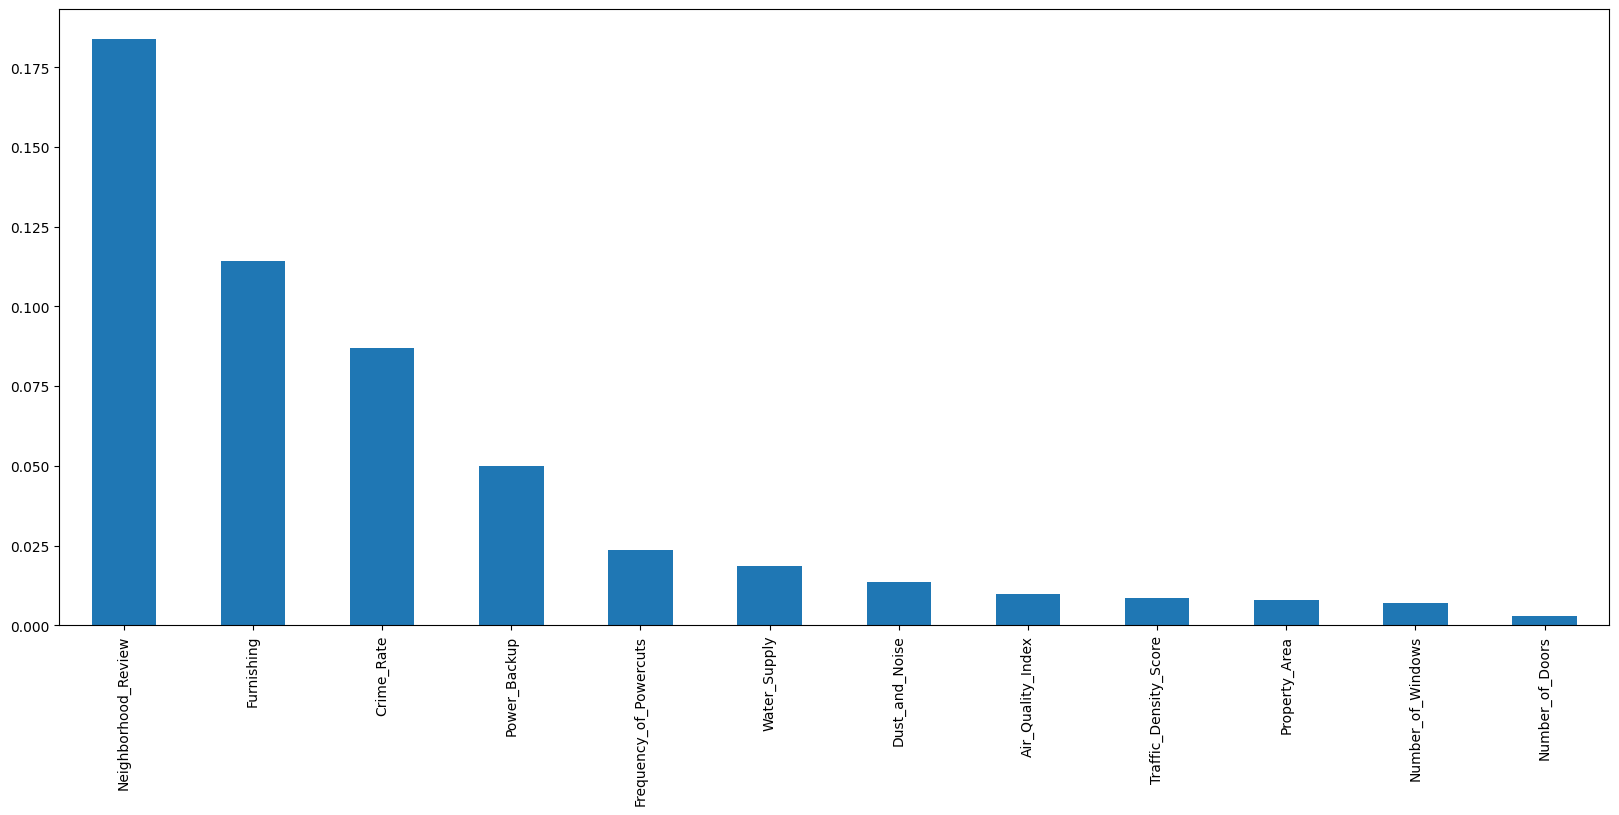

In [ ]:
#plot mutual information scores
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
#filter method to select the best features
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import mean_squared_error

mse_list = []

for feature in range(1,13):
    #instantiate the SelectKBest class



    
    select_k_best = SelectKBest(score_func=mutual_info_regression, k=feature)
    
    #fit the model
    fit_model = select_k_best.fit(X_train, y_train)
    
    #transform the data
    X_train_v1_selected = fit_model.transform(X_train)
    X_test_v1_selected = fit_model.transform(X_test)

    model_3.fit(X_train_v1_selected, y_train)
    y_pred = model_3.predict(X_test_v1_selected)

    #calculate accuracy
    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    print('MSE with %d best features: %.5f' % (feature, mse))

    accuracy = model_3.score(X_test_v1_selected, y_test)
    print('Accuracy with %d best features: %.5f' % (feature, accuracy))
    


MSE with 1 best features: 139.26931
Accuracy with 1 best features: 0.31168
MSE with 2 best features: 87.04611
Accuracy with 2 best features: 0.56979
MSE with 3 best features: 86.56008
Accuracy with 3 best features: 0.57219
MSE with 4 best features: 54.18317
Accuracy with 4 best features: 0.73221
MSE with 5 best features: 52.50645
Accuracy with 5 best features: 0.74050
MSE with 6 best features: 51.65009
Accuracy with 6 best features: 0.74473
MSE with 7 best features: 53.27892
Accuracy with 7 best features: 0.73668
MSE with 8 best features: 52.77719
Accuracy with 8 best features: 0.73916
MSE with 9 best features: 37.36045
Accuracy with 9 best features: 0.81535
MSE with 10 best features: 36.55805
Accuracy with 10 best features: 0.81932
MSE with 11 best features: 36.42339
Accuracy with 11 best features: 0.81998
MSE with 12 best features: 36.34555
Accuracy with 12 best features: 0.82037


In [ ]:
#get the new new xgboost model
from sklearn.metrics import accuracy_score
model_3.fit(X_train_3, y_train)

#make predictions
y_pred = model_3.predict(X_test_3)


In [ ]:
X_train_5, X_test_5, y_train_5, y_test_5 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [ ]:
#import lightgbm classifier
import lightgbm as lgb

model_5 = lgb.LGBMRegressor()

model_5.fit(X_train_5, y_train_5)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1046
[LightGBM] [Info] Number of data points in the train set: 25279, number of used features: 12
[LightGBM] [Info] Start training from score 73.428097


LGBMRegressor()

In [ ]:
y_pred_5 = model_5.predict(X_test_5)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming y_true and y_pred are arrays of true and predicted values, respectively

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_5, y_pred_5)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_5, y_pred_5)
print("Mean Absolute Error (MAE):", mae)

# R-squared (R^2) Score
r2 = r2_score(y_test_5, y_pred_5)
print("R-squared (R^2) Score:", r2)

# Adjusted R-squared (R^2) Score
n = len(y_test_5)
p = X_train_1.shape[1]  
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error (MSE): 37.480005983976106
Root Mean Squared Error (RMSE): 6.122091634725513
Mean Absolute Error (MAE): 4.814341171630971
R-squared (R^2) Score: 0.8147612816439983
Adjusted R-squared: 0.8144088375944863


In [ ]:
predictions = model_3.predict(predict_data_2)
predictions

array([75.80262 , 74.23862 , 75.37423 , ..., 75.69057 , 67.49761 ,
       82.359276], dtype=float32)

In [ ]:
y_test_df = pd.DataFrame(predictions, columns=['Habitability_score'])
y_test_df.head()

,Habitability_score
0,75.802620
1,74.238617
2,75.374229
3,80.917320
4,74.041824


In [ ]:
predict_id = pd.DataFrame(predict_data_1['Id'], columns=['Id'])

predict_id.head()

,Id
0,0x6808
1,0x6a98
2,0xacc0
3,0x8225
4,0xaee8


In [ ]:
output_df = pd.concat([predict_id, y_test_df], axis=1)

In [ ]:
output_df.to_csv('submission4.csv', index=False)